In [32]:
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms

In [33]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 300, bias=False),
            nn.Sigmoid(),
            nn.Linear(300, 10, bias=False)
        )
        self.apply(self._init_weights)
    
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.uniform_(-1.0, 1.0)
    
    def forward(self, x):
        return self.layers(x)

In [34]:
torch.manual_seed(3)

In [35]:
train_dataset = MNIST('./mnist_train/', train=True, download=True, transform=transforms.ToTensor())

In [36]:
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

In [37]:
test_dataset = MNIST('./mnist_test', train=False, download=True, transform=transforms.ToTensor())

In [38]:
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

In [39]:
torch.manual_seed(3)

In [40]:
mlp = MLP()

In [41]:
ce_loss = nn.CrossEntropyLoss()

In [42]:
optimizer = torch.optim.SGD(mlp.parameters(), lr=10)

In [43]:
costs = []

In [44]:
print('Starting training...')
for epoch in range(0, 200):
    print(f'Starting epoch {epoch+1}')
    current_loss = 0.0
    epoch_loss = 0.0
    for i, data in enumerate(train_data_loader, 0):
        inputs, targets = data
        optimizer.zero_grad()
        outputs = mlp(inputs)
        loss = ce_loss(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()
        if i % 100 == 99:
            print('Loss after batch %5d: %.3f' % ((i+1)*64, current_loss))
            epoch_loss += current_loss
            current_loss = 0.0
    costs.append(epoch_loss)
print('Training completed')

Starting training...
Starting epoch 1
Loss after batch  6400: 4144.023
Loss after batch 12800: 409.697
Loss after batch 19200: 196.901
Loss after batch 25600: 169.634
Loss after batch 32000: 153.302
Loss after batch 38400: 137.755
Loss after batch 44800: 110.161
Loss after batch 51200: 103.873
Loss after batch 57600: 83.672
Starting epoch 2
Loss after batch  6400: 62.528
Loss after batch 12800: 59.635
Loss after batch 19200: 63.906
Loss after batch 25600: 50.460
Loss after batch 32000: 55.045
Loss after batch 38400: 46.541
Loss after batch 44800: 44.298
Loss after batch 51200: 44.500
Loss after batch 57600: 42.407
Starting epoch 3
Loss after batch  6400: 40.091
Loss after batch 12800: 39.927
Loss after batch 19200: 46.211
Loss after batch 25600: 36.804
Loss after batch 32000: 37.390
Loss after batch 38400: 35.617
Loss after batch 44800: 32.641
Loss after batch 51200: 32.683
Loss after batch 57600: 34.957
Starting epoch 4
Loss after batch  6400: 29.429
Loss after batch 12800: 28.485
Los

Starting epoch 29
Loss after batch  6400: 4.557
Loss after batch 12800: 4.693
Loss after batch 19200: 4.191
Loss after batch 25600: 4.853
Loss after batch 32000: 5.339
Loss after batch 38400: 4.705
Loss after batch 44800: 5.441
Loss after batch 51200: 4.900
Loss after batch 57600: 5.382
Starting epoch 30
Loss after batch  6400: 4.206
Loss after batch 12800: 3.799
Loss after batch 19200: 3.541
Loss after batch 25600: 4.225
Loss after batch 32000: 5.011
Loss after batch 38400: 4.958
Loss after batch 44800: 4.375
Loss after batch 51200: 5.187
Loss after batch 57600: 4.248
Starting epoch 31
Loss after batch  6400: 3.800
Loss after batch 12800: 3.940
Loss after batch 19200: 5.094
Loss after batch 25600: 4.964
Loss after batch 32000: 3.722
Loss after batch 38400: 2.877
Loss after batch 44800: 3.388
Loss after batch 51200: 5.678
Loss after batch 57600: 5.357
Starting epoch 32
Loss after batch  6400: 2.904
Loss after batch 12800: 4.379
Loss after batch 19200: 4.853
Loss after batch 25600: 4.71

Loss after batch 32000: 0.272
Loss after batch 38400: 0.750
Loss after batch 44800: 1.035
Loss after batch 51200: 0.655
Loss after batch 57600: 0.294
Starting epoch 58
Loss after batch  6400: 0.417
Loss after batch 12800: 0.329
Loss after batch 19200: 0.497
Loss after batch 25600: 0.547
Loss after batch 32000: 0.434
Loss after batch 38400: 0.445
Loss after batch 44800: 0.587
Loss after batch 51200: 0.555
Loss after batch 57600: 0.656
Starting epoch 59
Loss after batch  6400: 0.528
Loss after batch 12800: 0.490
Loss after batch 19200: 0.473
Loss after batch 25600: 0.463
Loss after batch 32000: 0.414
Loss after batch 38400: 0.291
Loss after batch 44800: 0.385
Loss after batch 51200: 0.435
Loss after batch 57600: 0.601
Starting epoch 60
Loss after batch  6400: 0.453
Loss after batch 12800: 0.412
Loss after batch 19200: 0.554
Loss after batch 25600: 0.470
Loss after batch 32000: 0.233
Loss after batch 38400: 0.423
Loss after batch 44800: 0.493
Loss after batch 51200: 0.546
Loss after batch

Starting epoch 86
Loss after batch  6400: 0.223
Loss after batch 12800: 0.181
Loss after batch 19200: 0.388
Loss after batch 25600: 0.252
Loss after batch 32000: 0.201
Loss after batch 38400: 0.161
Loss after batch 44800: 0.479
Loss after batch 51200: 0.445
Loss after batch 57600: 0.165
Starting epoch 87
Loss after batch  6400: 0.328
Loss after batch 12800: 0.224
Loss after batch 19200: 0.229
Loss after batch 25600: 0.329
Loss after batch 32000: 0.218
Loss after batch 38400: 0.201
Loss after batch 44800: 0.341
Loss after batch 51200: 0.271
Loss after batch 57600: 0.327
Starting epoch 88
Loss after batch  6400: 0.370
Loss after batch 12800: 0.227
Loss after batch 19200: 0.351
Loss after batch 25600: 0.362
Loss after batch 32000: 0.231
Loss after batch 38400: 0.205
Loss after batch 44800: 0.238
Loss after batch 51200: 0.160
Loss after batch 57600: 0.332
Starting epoch 89
Loss after batch  6400: 0.337
Loss after batch 12800: 0.294
Loss after batch 19200: 0.257
Loss after batch 25600: 0.30

Loss after batch 32000: 2.947
Loss after batch 38400: 1.871
Loss after batch 44800: 2.517
Loss after batch 51200: 2.074
Loss after batch 57600: 2.228
Starting epoch 115
Loss after batch  6400: 1.748
Loss after batch 12800: 1.964
Loss after batch 19200: 1.953
Loss after batch 25600: 3.244
Loss after batch 32000: 2.515
Loss after batch 38400: 3.000
Loss after batch 44800: 3.993
Loss after batch 51200: 3.514
Loss after batch 57600: 2.706
Starting epoch 116
Loss after batch  6400: 1.961
Loss after batch 12800: 2.466
Loss after batch 19200: 2.015
Loss after batch 25600: 2.862
Loss after batch 32000: 3.047
Loss after batch 38400: 1.700
Loss after batch 44800: 2.580
Loss after batch 51200: 1.762
Loss after batch 57600: 2.210
Starting epoch 117
Loss after batch  6400: 2.046
Loss after batch 12800: 1.744
Loss after batch 19200: 1.626
Loss after batch 25600: 2.043
Loss after batch 32000: 2.480
Loss after batch 38400: 2.188
Loss after batch 44800: 2.158
Loss after batch 51200: 2.216
Loss after ba

Loss after batch 57600: 0.260
Starting epoch 143
Loss after batch  6400: 0.235
Loss after batch 12800: 0.242
Loss after batch 19200: 0.296
Loss after batch 25600: 0.127
Loss after batch 32000: 0.154
Loss after batch 38400: 0.167
Loss after batch 44800: 0.193
Loss after batch 51200: 0.181
Loss after batch 57600: 0.308
Starting epoch 144
Loss after batch  6400: 0.146
Loss after batch 12800: 0.112
Loss after batch 19200: 0.214
Loss after batch 25600: 0.124
Loss after batch 32000: 0.173
Loss after batch 38400: 0.237
Loss after batch 44800: 0.498
Loss after batch 51200: 0.175
Loss after batch 57600: 0.172
Starting epoch 145
Loss after batch  6400: 0.129
Loss after batch 12800: 0.372
Loss after batch 19200: 0.077
Loss after batch 25600: 0.111
Loss after batch 32000: 0.234
Loss after batch 38400: 0.322
Loss after batch 44800: 0.288
Loss after batch 51200: 0.374
Loss after batch 57600: 0.134
Starting epoch 146
Loss after batch  6400: 0.132
Loss after batch 12800: 0.140
Loss after batch 19200: 

Loss after batch 19200: 0.250
Loss after batch 25600: 0.078
Loss after batch 32000: 0.169
Loss after batch 38400: 0.173
Loss after batch 44800: 0.179
Loss after batch 51200: 0.317
Loss after batch 57600: 0.161
Starting epoch 172
Loss after batch  6400: 0.230
Loss after batch 12800: 0.136
Loss after batch 19200: 0.331
Loss after batch 25600: 0.076
Loss after batch 32000: 0.064
Loss after batch 38400: 0.131
Loss after batch 44800: 0.171
Loss after batch 51200: 0.162
Loss after batch 57600: 0.214
Starting epoch 173
Loss after batch  6400: 0.288
Loss after batch 12800: 0.076
Loss after batch 19200: 0.133
Loss after batch 25600: 0.099
Loss after batch 32000: 0.147
Loss after batch 38400: 0.353
Loss after batch 44800: 0.109
Loss after batch 51200: 0.096
Loss after batch 57600: 0.108
Starting epoch 174
Loss after batch  6400: 0.162
Loss after batch 12800: 0.105
Loss after batch 19200: 0.197
Loss after batch 25600: 0.128
Loss after batch 32000: 0.119
Loss after batch 38400: 0.327
Loss after ba

Loss after batch 44800: 0.100
Loss after batch 51200: 0.278
Loss after batch 57600: 0.045
Starting epoch 200
Loss after batch  6400: 0.110
Loss after batch 12800: 0.178
Loss after batch 19200: 0.065
Loss after batch 25600: 0.166
Loss after batch 32000: 0.115
Loss after batch 38400: 0.069
Loss after batch 44800: 0.031
Loss after batch 51200: 0.168
Loss after batch 57600: 0.140
Training completed


In [46]:
print('Starting testing...')
with torch.no_grad():
    correct = 0
    total = 0
    for i, data in enumerate(test_data_loader, 0):
        inputs, targets = data
        outputs = mlp(inputs)
        _, predictions = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predictions == targets).sum().item()
    print('Test Accuracy: {:.2f} %'.format(100 * correct / total))
    print('Test Error: {:.2f} %'.format(100 - (100*correct/total)))

Starting testing...
Test Accuracy: 96.81 %
Test Error: 3.19 %


In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def plot_cost():
    plt.figure()
    plt.plot(np.arange(len(costs)), costs)
    plt.xlabel("epochs")
    plt.ylabel("cost")
    plt.show()

In [ ]:
# Batch size = 64
# epochs = 200
# lr = 10

Starting testing...
Test Accuracy: 96.81 %
Test Error: 3.19 %

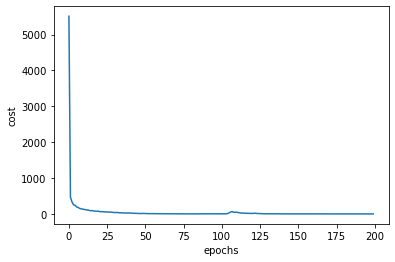

In [49]:
plot_cost()

In [50]:
len(costs)

200